In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

import warnings
warnings.simplefilter('ignore')


**Pandas:**- It has functions for analyzing, cleaning, exploring, and manipulating data. 
**matplot:-** for creating static, animated, and interactive visualizations.
**seaborn:-** data visualization library that is commonly used for data science and machine learning tasks. 
**numpy:-** to perform a wide variety of mathematical operations on arrays.
**scipy:-** to solve scientific and mathematical problems. It is built on the NumPy extension and allows the user to manipulate and visualize data with a wide range of high-level commands.
**ast**:- “ast” expands to Abstract Syntax Tree.The literal_eval safely evaluate an expression node or a string containing a Python literal or container display.

**sklearn.feature_extraction.text:**
TfidfVectorizer: Converts a collection of raw documents into a matrix of TF-IDF features.
CountVectorizer: Converts a collection of text documents into a matrix of token counts.
**sklearn.metrics.pairwise:**
linear_kernel: Computes the linear kernel between two vectors.
cosine_similarity: Computes the cosine similarity between pairs of vectors.
**nltk.stem.snowball:**
SnowballStemmer: Implements the Snowball stemming algorithm for various languages.
**nltk.stem.wordnet:**
WordNetLemmatizer: Lemmatizes words using WordNet lexical database.
**nltk.corpus:**
wordnet: Provides lexical database for English language, including synonyms and semantic relationships.
**surprise:**
Reader: Reads files in the appropriate format to be used by Surprise.
Dataset: Loads datasets into Surprise's format for recommendation tasks.
SVD: Implements Singular Value Decomposition (SVD) for collaborative filtering.
**surprise.model_selection:**
cross_validate: Performs cross-validation of recommendation models to assess their performance.
warnings:

**simplefilter:** Sets the warning filter to ignore or handle warnings in a simple manner, such as ignoring all warnings.





	For the above formula which was displayed in the Proposed model for our project, An Incremental approach of selection of Bias, we have taken a Movie lens dataset of Tollywood Movies and we have implemented two methods, one is Existing Work and other is Incremental Approach. 
	In Existing work, we have taken the Movie lens data of Tollywood and we have implemented the Cosine Similarity in it and we have recommended the movies by using the cosine similarity. To find the accuracy of the Existing work we have used the Navie Bias in it to test and train the model of the Existing work.
o	In Incremental Approach we have taken the same dataset and our basic idea behind this Incremental Approach recommendation is that movies that are more popular and more critically acclaimed will have a higher probability of being liked by the average audience.

We have used the TMDB Ratings to come up with our Top Movies Chart. We have used IMDB's (Internet Movie database) weighted rating formula to construct my chart. Mathematically, it is represented as follows:
Weighted Rating (WR) = (v/v+m *R) + (m/v+m * C)
where, v is the number of votes for the movie m is the minimum votes required to be listed in the chart R is the average rating of the movie C is the mean vote across the whole report.
o	After, the implementation of the above formula we need to determine the appropriate value for m, the minimum votes required to be listed in the chart.
o	We don’t have a quantitative metric to judge our machine’s performance so we have done in a qualitatively.
o	We have used the TF-IDF Vectorizer, so that to calculate the dot product it will directly gives the Cosine Similarity Score.
o	Our main aim of our project is that it recommends movies based on Bias and Popularity.
o	Therefore, we have added a mechanism called Collaborative Filtering on the basis of user to remove bad movies and return movies which are popular and have had a good critical response.



In [2]:
df = pd.read_csv("/kaggle/input/csp2-final-dataset/TM_dataset.csv")

In [3]:
df.head()

,movieId,title,year,Certificate,genres\t,Overview,Runtime,vote_average,vote_count,timestamp
0,0,Bahubali: The Beginning,2015.0,UA,"Action, Drama","In ancient India, an adventurous and darin...",159,8.1,99114,1260759144
1,1,Baahubali 2: The Conclusion,2017.0,UA,"Action, Drama","When Shiva, the son of Bahubali, learns ab...",167,8.2,71458,1260759179
2,2,1 - Nenokkadine,2014.0,UA,"Action, Thriller",A rock star must overcome his psychologica...,170,8.1,42372,1260759182
3,3,Dhoom:3,2013.0,UA,"Action, Thriller","When Sahir, a circus entertainer trained i...",172,5.4,42112,1260759185
4,4,Ra.One,2011.0,U,"Action, Adventure, Sci-Fi",When the titular antagonist of an action g...,156,4.6,37211,1260759205


In [4]:
df.head

<bound method NDFrame.head of       movieId                          title    year Certificate  \
0           0        Bahubali: The Beginning  2015.0          UA   
1           1    Baahubali 2: The Conclusion  2017.0          UA   
2           2                1 - Nenokkadine  2014.0          UA   
3           3                        Dhoom:3  2013.0          UA   
4           4                         Ra.One  2011.0           U   
...       ...                            ...     ...         ...   
1436     1436      Ambajipeta Marriage Band   2024.0          UA   
1437     1437                   Family Star   2024.0          UA   
1438     1438         Masthu Shades Unnai Ra  2024.0           U   
1439     1439                  Guntur Kaaram  2024.0          UA   
1440     1440  90's - A Middle Class Biopic   2024.0           U   

                                   genres\t  \
0                 Action, Drama               
1                 Action, Drama               
2           

In [5]:
df.describe()

,movieId,year,Runtime,vote_average,vote_count,timestamp
count,1441.000000,1393.000000,1441.000000,1441.000000,1441.000000,1.441000e+03
mean,720.000000,2005.550610,122.599584,6.335115,1488.231783,1.063625e+09
std,416.125181,13.316621,55.385129,1.309692,5617.105822,1.506677e+08
min,0.000000,1932.000000,0.000000,1.000000,49.000000,8.353554e+08
25%,360.000000,1998.000000,125.000000,5.500000,94.000000,9.498963e+08
50%,720.000000,2009.000000,142.000000,6.500000,268.000000,1.035259e+09
75%,1080.000000,2016.000000,154.000000,7.300000,915.000000,1.154473e+09
max,1440.000000,2024.000000,300.000000,9.500000,110088.000000,1.469331e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movieId       1441 non-null   int64  
 1   title         1441 non-null   object 
 2   year          1393 non-null   float64
 3   Certificate   992 non-null    object 
 4   genres	       1430 non-null   object 
 5   Overview      1262 non-null   object 
 6   Runtime       1441 non-null   int64  
 7   vote_average  1441 non-null   float64
 8   vote_count    1441 non-null   int64  
 9   timestamp     1441 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 112.7+ KB


In [7]:
df.columns

Index(['movieId', 'title', 'year', 'Certificate', 'genres\t', 'Overview',
       'Runtime', 'vote_average', 'vote_count', 'timestamp'],
      dtype='object')

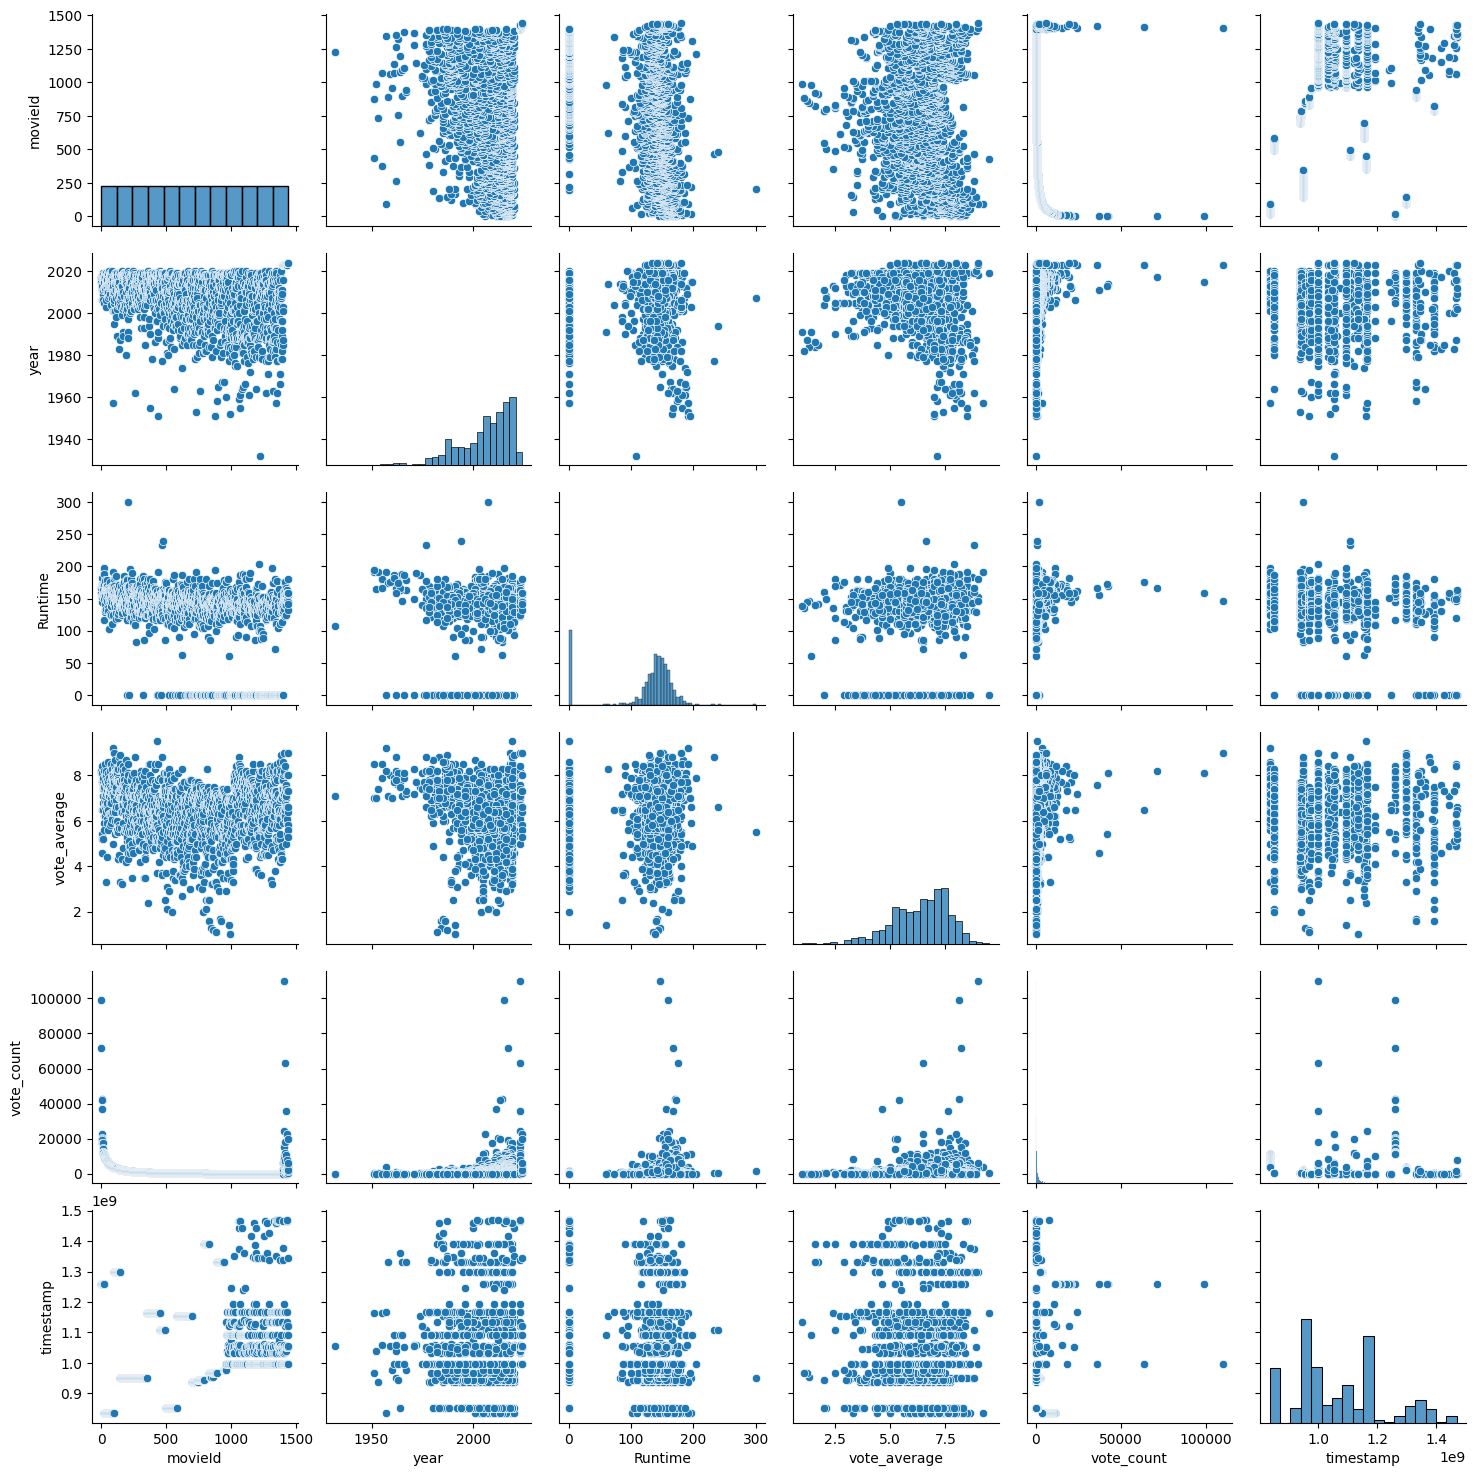

In [8]:
sns.pairplot(df)

In [9]:
df.isnull()

,movieId,title,year,Certificate,genres\t,Overview,Runtime,vote_average,vote_count,timestamp
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1436,False,False,False,False,False,False,False,False,False,False
1437,False,False,False,False,False,False,False,False,False,False
1438,False,False,False,False,False,False,False,False,False,False
1439,False,False,False,False,False,False,False,False,False,False


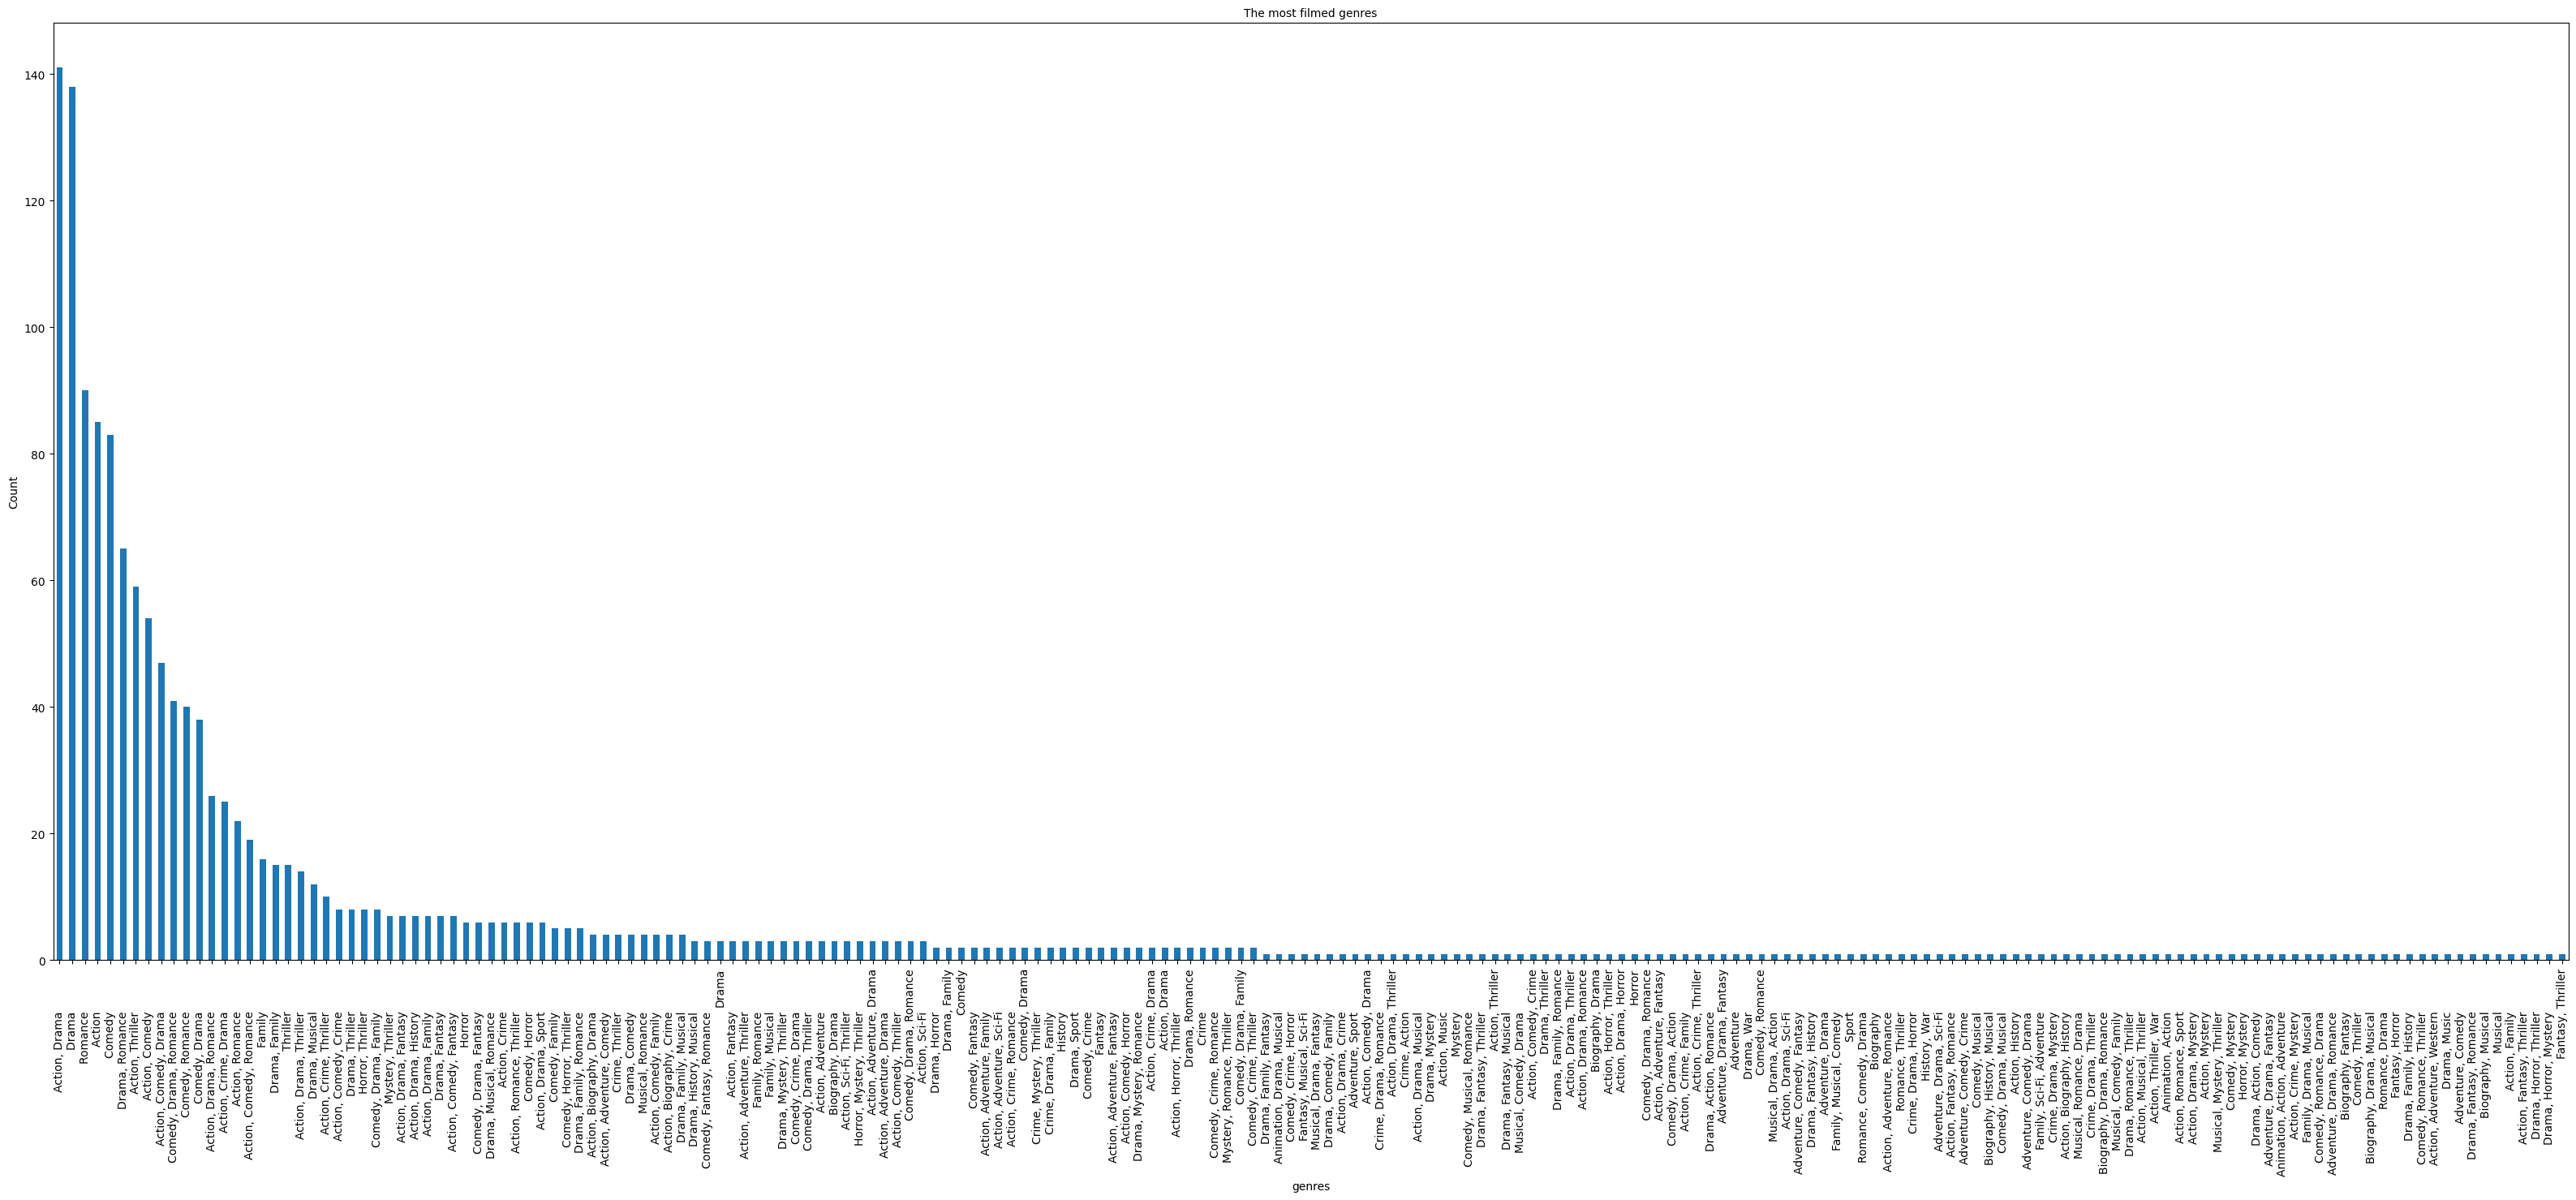

In [10]:
plt.figure(figsize=(40,15))
df['genres\t'].value_counts().plot(kind="bar")
plt.title("The most filmed genres", fontsize=(10))
plt.xlabel("genres", fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.show()

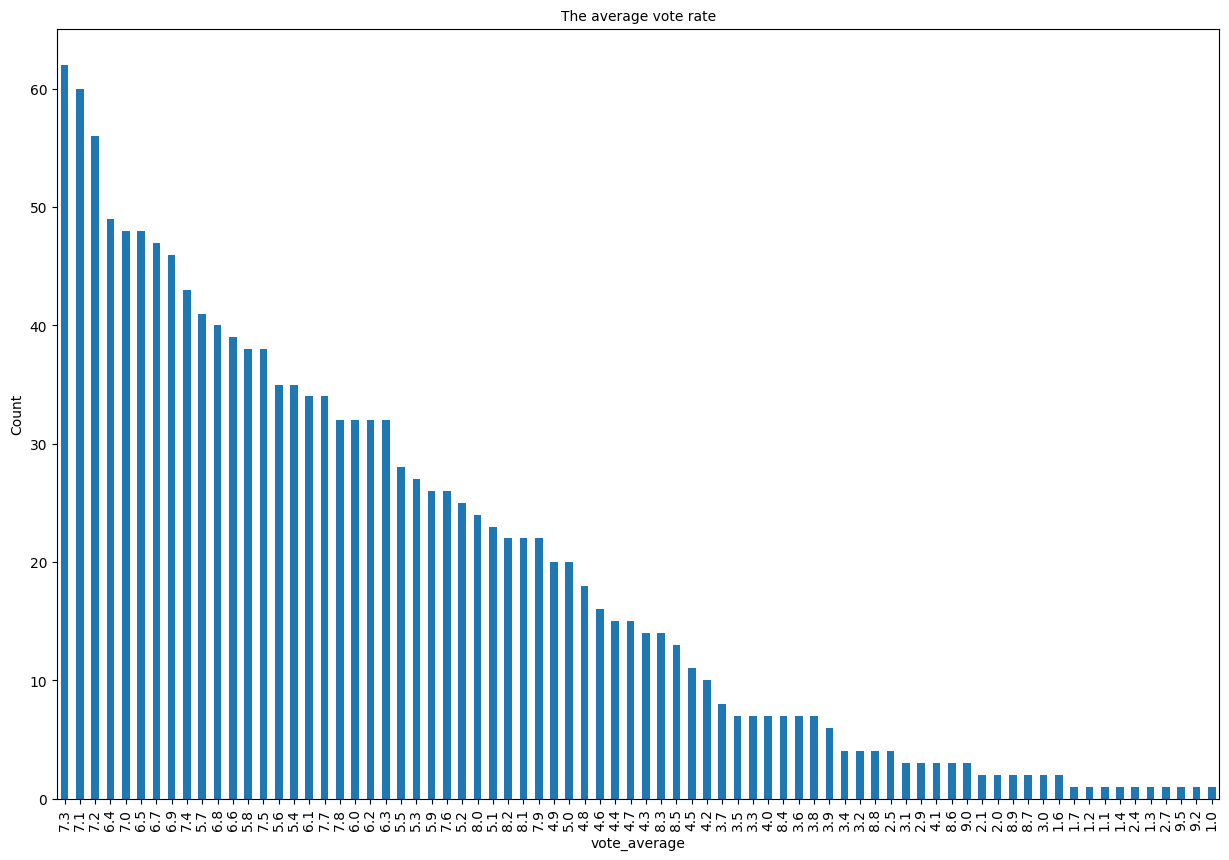

In [11]:
plt.figure(figsize=(15,10))
df['vote_average'].value_counts().plot(kind="bar")
plt.title("The average vote rate", fontsize=(10))
plt.xlabel("vote_average", fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.show()

In [12]:
df.isnull().sum()

movieId           0
title             0
year             48
Certificate     449
genres\t         11
Overview        179
Runtime           0
vote_average      0
vote_count        0
timestamp         0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.head

<bound method NDFrame.head of       movieId                          title    year Certificate  \
0           0        Bahubali: The Beginning  2015.0          UA   
1           1    Baahubali 2: The Conclusion  2017.0          UA   
2           2                1 - Nenokkadine  2014.0          UA   
3           3                        Dhoom:3  2013.0          UA   
4           4                         Ra.One  2011.0           U   
...       ...                            ...     ...         ...   
1436     1436      Ambajipeta Marriage Band   2024.0          UA   
1437     1437                   Family Star   2024.0          UA   
1438     1438         Masthu Shades Unnai Ra  2024.0           U   
1439     1439                  Guntur Kaaram  2024.0          UA   
1440     1440  90's - A Middle Class Biopic   2024.0           U   

                                   genres\t  \
0                 Action, Drama               
1                 Action, Drama               
2           

In [16]:
df.iloc[0]

movieId                                                         0
title                                     Bahubali: The Beginning
year                                                       2015.0
Certificate                                                    UA
genres\t                                Action, Drama            
Overview            In ancient India, an adventurous and darin...
Runtime                                                       159
vote_average                                                  8.1
vote_count                                                  99114
timestamp                                              1260759144
Name: 0, dtype: object

In [17]:
df.iloc[0].Runtime

159

In [18]:
df.shape

(881, 10)

In [19]:
import pandas as pd
from ast import literal_eval

def process_dataframe(data):
    data['genres'] = data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
    return data




In [20]:
MM = pd.read_csv("/kaggle/input/tollywood-dataset-csp2/Tollywood_dataset.csv")

In [21]:
MM

,movieId,title,year,Certificate,genres\t,Overview,Runtime,vote_average,vote_count,timestamp,tagline,description,popularity
0,0,Bahubali: The Beginning,2015.0,UA,"Action, Drama","In ancient India, an adventurous and darin...",159,8.1,99114,1260759144,It was a good movie,Telugu Movie (TFI),150.437577
1,1,Baahubali 2: The Conclusion,2017.0,UA,"Action, Drama","When Shiva, the son of Bahubali, learns ab...",167,8.2,71458,1260759179,Not bad,Telugu Movie (TFI),139.082615
2,2,1 - Nenokkadine,2014.0,UA,"Action, Thriller",A rock star must overcome his psychologica...,170,8.1,42372,1260759182,Feel good movie,Telugu Movie (TFI),107.376788
3,3,Dhoom:3,2013.0,UA,"Action, Thriller","When Sahir, a circus entertainer trained i...",172,5.4,42112,1260759185,The best movie,Telugu Movie (TFI),112.312950
4,4,Ra.One,2011.0,U,"Action, Adventure, Sci-Fi",When the titular antagonist of an action g...,156,4.6,37211,1260759205,Good movie,Telugu Movie (TFI),43.926995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,1436,Ambajipeta Marriage Band,2024.0,UA,Drama,"In a small village during the early 2000s, hap...",144,6.6,594,1052896916,It was a good movie,Telugu Movie (TFI),13.668633
1437,1437,Family Star,2024.0,UA,"Drama, Family",The highs and lows of family relationships in ...,159,5.6,1331,1345397769,It was a good movie,Telugu Movie (TFI),9.780588
1438,1438,Masthu Shades Unnai Ra,2024.0,U,Comedy,"Manu, an artist, is on a mission to get notice...",142,7.3,2095,1054449678,It was a good movie,Telugu Movie (TFI),9.904881
1439,1439,Guntur Kaaram,2024.0,UA,"Action, Drama",Years after his mother abandons him and remarr...,159,5.3,19721,1122576690,It was a good movie,Telugu Movie (TFI),9.789027


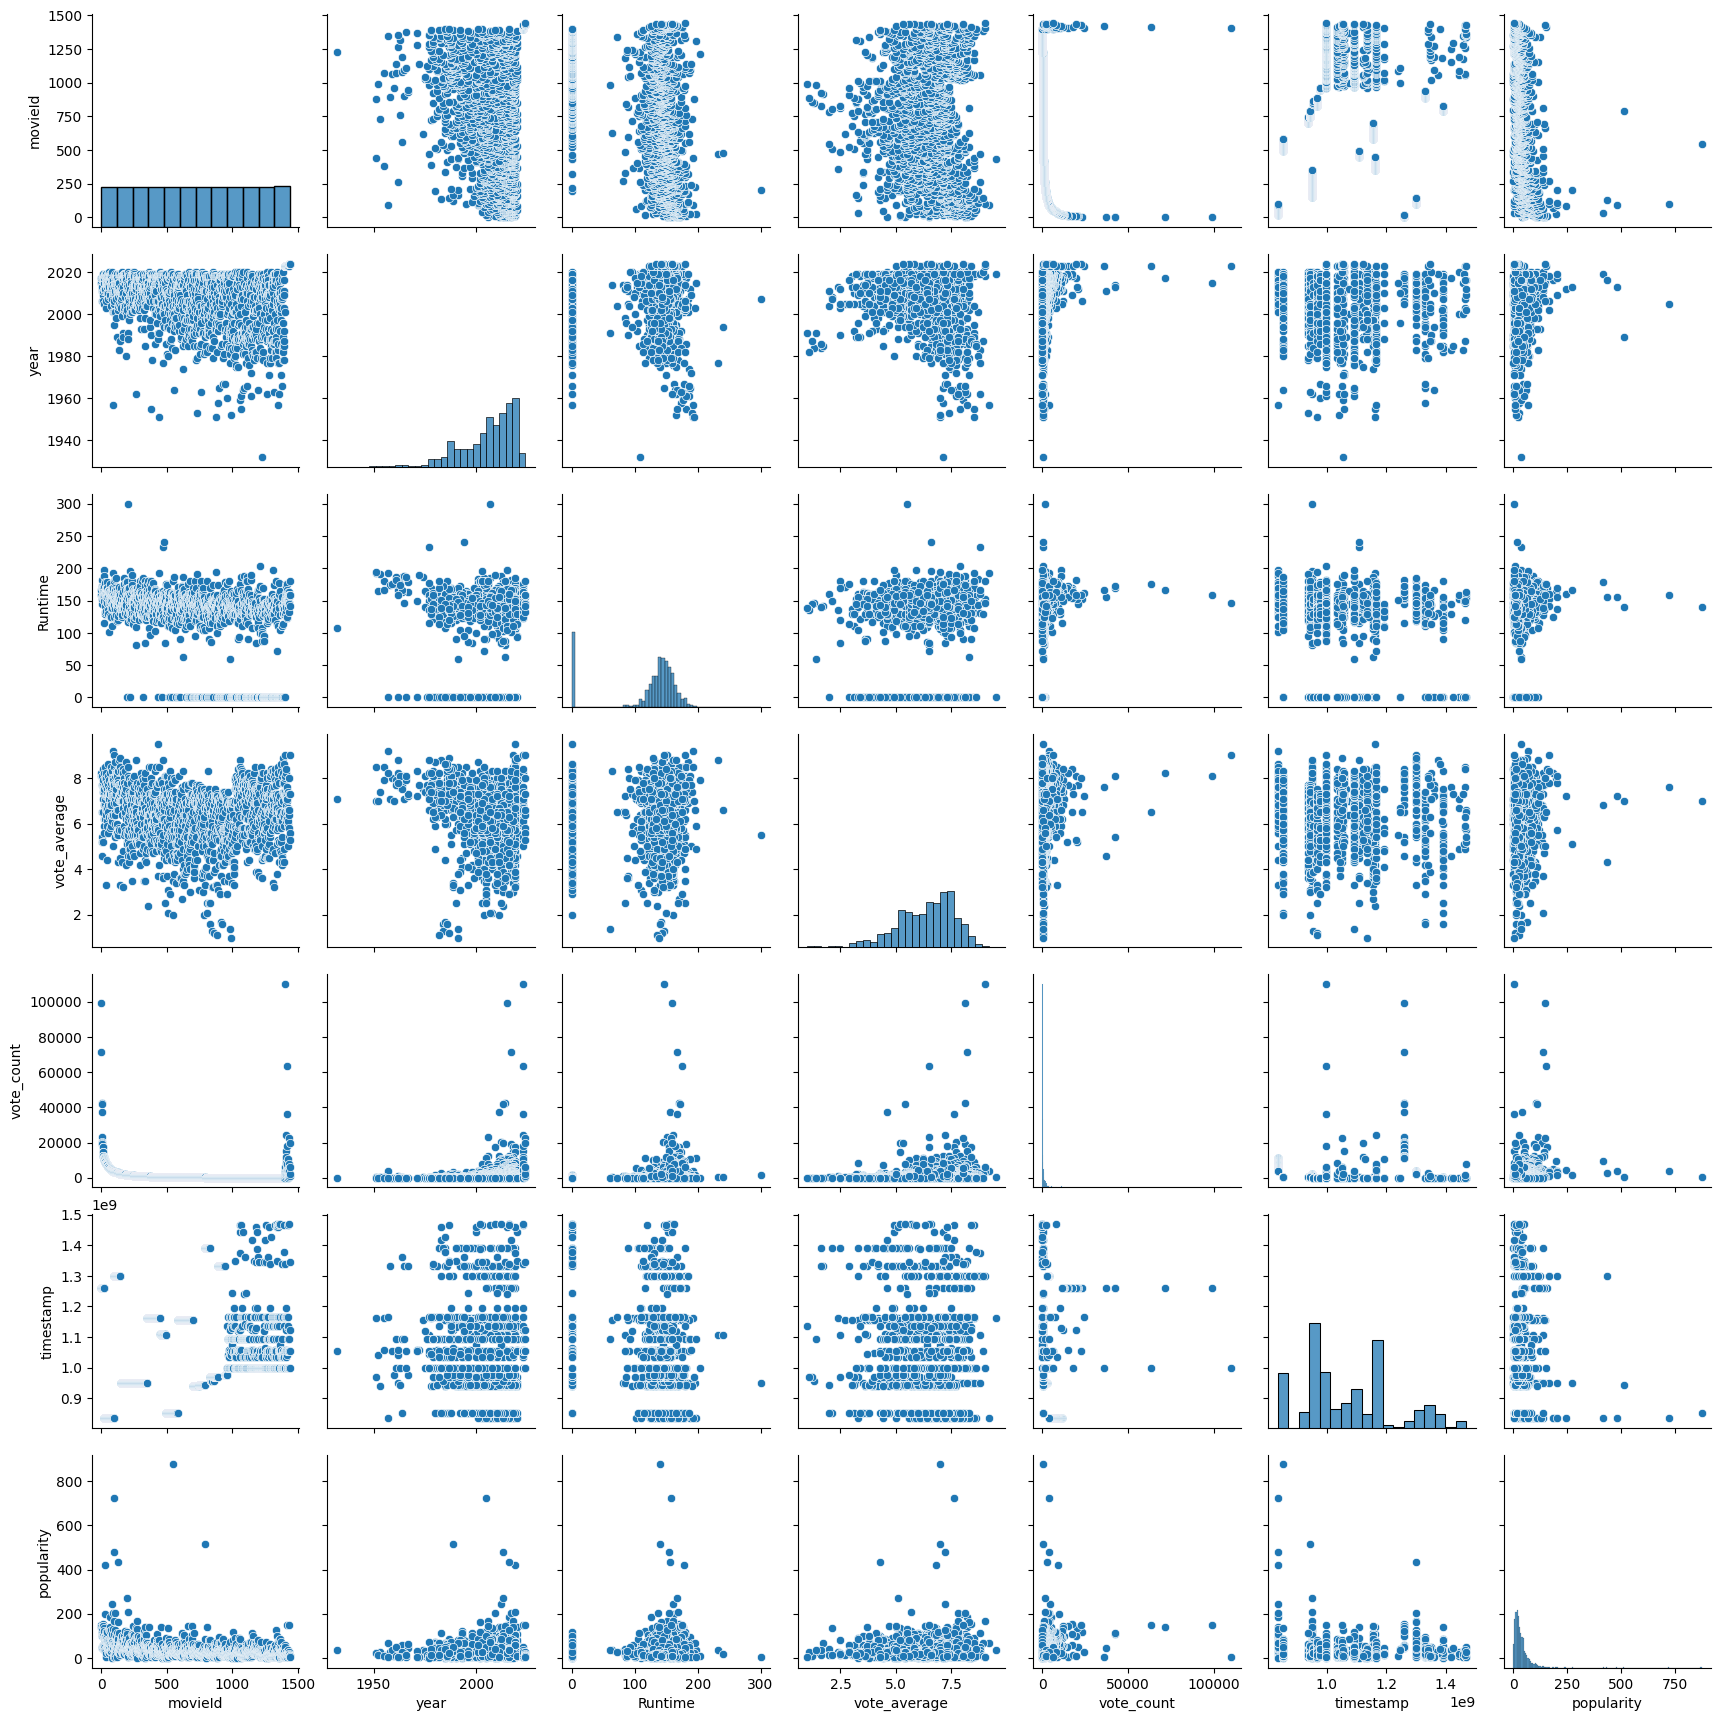

In [22]:
sns.pairplot(MM)

* The basic idea behind this recommender is that movies that are more popular and more critically acclaimed will have a higher probability of being liked by the average audience.

* This model does not give personalized recommendations based on the user.
I use the TMDB Ratings to come up with our Top Movies Chart.
I will use IMDB's weighted rating formula to construct my chart.
Mathematically, it is represented as follows:
 
Weighted Rating(WR) = (v/v+m *R) + (m/v+m * C)

where,
    v is the number of votes for the movie
    m is the minimum votes required to be listed in the chart
    R is the average rating of the movie
    C is the mean vote across the whole report

In [23]:
# this is V
vote_counts = MM[MM['vote_count'].notnull()]['vote_count'].astype('int')

# this is R
vote_averages = MM[MM['vote_average'].notnull()]['vote_average'].astype('int')

# this is C
C = vote_averages.mean()
C



5.895211658570437

 We need to determine an appropriate value for m, the minimum votes required to be listed in the chart.


In [24]:
m = vote_counts.quantile(0.95)
m

5868.0

In [25]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)


In [26]:
MM['year'] = pd.to_datetime(MM['Runtime'], errors='coerce').apply(
    lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [27]:
import pandas as pd

qualified = MM[(MM['vote_count'] >= m) & 
               (MM['vote_count'].notnull()) & 
               (MM['vote_average'].notnull())][['title', 
                                                'year',
                                                'vote_count', 
                                                'vote_average', 
                                                ]]

qualified['vote_count'] = qualified['vote_count'].astype(int)
qualified['vote_average'] = qualified['vote_average'].astype(int)
qualified.shape


(73, 4)

In [28]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [29]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)

In [30]:
qualified = qualified.sort_values('wr', ascending=False).head(20)

**Top Movies**

In [31]:
qualified.head(15)

,title,year,vote_count,vote_average,wr
1403,12th Fail,1970,110088,9,8.842881
0,Bahubali: The Beginning,1970,99114,8,7.882352
1,Baahubali 2: The Conclusion,1970,71458,8,7.840275
2,1 - Nenokkadine,1970,42372,8,7.743970
1430,Hanu Man,1970,22455,8,7.563927
8,Arjun Reddy,1970,19419,8,7.511571
1440,90's - A Middle Class Biopic,1970,6253,9,7.496915
9,Rangasthalam,1970,17559,8,7.472792
1406,Hi Nanna,1970,15181,8,7.413231
1411,2018,1970,11972,8,7.307685


In [32]:
links_small = pd.read_csv("/kaggle/input/linkscsp2/links1.csv")

In [33]:
links_small

,movieId,imdbId,tmdbId,overview,tagline,description
0,1,114709,862.0,"In ancient India, an adventurous and darin...",It was a good movie,Telugu Movie (TFI)
1,2,113497,8844.0,"When Shiva, the son of Bahubali, learns ab...",Not bad,Telugu Movie (TFI)
2,3,113228,15602.0,A rock star must overcome his psychologica...,Feel good movie,Telugu Movie (TFI)
3,4,114885,31357.0,"When Sahir, a circus entertainer trained i...",The best movie,Telugu Movie (TFI)
4,5,113041,11862.0,When the titular antagonist of an action g...,Good movie,Telugu Movie (TFI)
...,...,...,...,...,...,...
45838,176269,6209470,439050.0,NaN,NaN,NaN
45839,176271,2028550,111109.0,NaN,NaN,NaN
45840,176273,303758,67758.0,NaN,NaN,NaN
45841,176275,8536,227506.0,NaN,NaN,NaN


In [34]:
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

In [35]:
links_small.head

<bound method NDFrame.head of 0           862
1          8844
2         15602
3         31357
4         11862
          ...  
45838    439050
45839    111109
45840     67758
45841    227506
45842    461257
Name: tmdbId, Length: 45624, dtype: int64>

In [36]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [37]:
MM['movieId'] = MM['movieId'].apply(convert_int)
MM[MM['movieId'].isnull()]

,movieId,title,year,Certificate,genres\t,Overview,Runtime,vote_average,vote_count,timestamp,tagline,description,popularity


In [38]:
MM['movieId'] = MM['movieId'].astype('int')

In [39]:
smd = MM[MM['movieId'].isin(links_small)]
smd.shape

(924, 13)

# Content based recommendation system
We builded a recommender using movie descriptions and taglines.
We do not have a quantitative metric to judge our machine's performance so this will have to be done qualitatively.

In [40]:
smd['tagline'] = smd['tagline'].fillna('')
smd['description'] = smd['Overview'] + smd['tagline']
smd['description'] = smd['description'].fillna('')

In [41]:
smd.head

<bound method NDFrame.head of       movieId                          title  year Certificate  \
2           2                1 - Nenokkadine  1970          UA   
3           3                        Dhoom:3  1970          UA   
5           5                        Dhoom:2  1970          UA   
6           6                           Eega  1970          UA   
11         11                            War  1970          UA   
...       ...                            ...   ...         ...   
1430     1430                       Hanu Man  1970          UA   
1433     1433                       Premalu   1970           U   
1435     1435        Ooru Peru Bhairavakona   1970          UA   
1439     1439                  Guntur Kaaram  1970          UA   
1440     1440  90's - A Middle Class Biopic   1970           U   

                          genres\t  \
2     Action, Thriller               
3     Action, Thriller               
5     Action, Thriller               
6      Action, Fantasy   

In [42]:
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

import warnings
warnings.simplefilter('ignore')


In [43]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')



In [44]:
tfidf_matrix = tf.fit_transform(smd['description'])

In [45]:
tfidf_matrix.shape

(924, 14687)

* Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score.

* Therefore, we will use sklearn's linear_kernel instead of cosine_similarities since it is much faster.

In [46]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [47]:
cosine_sim[0]

array([1.00000000e+00, 9.80429745e-04, 0.00000000e+00, 3.40099958e-02,
       4.33299562e-03, 3.36126930e-03, 3.61205000e-03, 3.60111597e-03,
       3.73508394e-03, 3.68229892e-03, 3.68236496e-03, 4.25317147e-03,
       3.42699090e-03, 3.62073455e-03, 3.94168469e-03, 3.97394220e-03,
       2.63729016e-02, 2.57279457e-03, 4.65253193e-03, 3.23201844e-03,
       2.67105814e-02, 3.16076437e-03, 2.91474045e-02, 2.64310253e-03,
       4.51727652e-03, 3.14666832e-03, 2.99482588e-03, 4.43529535e-03,
       4.14624473e-03, 4.18962922e-03, 4.37253108e-03, 3.19942740e-03,
       4.06166938e-03, 2.63404188e-02, 3.27566649e-03, 3.86319085e-03,
       3.02488666e-03, 3.67547345e-03, 3.27197563e-03, 3.16639771e-03,
       3.01112640e-03, 3.55261115e-02, 3.54425330e-03, 3.20155230e-03,
       3.17222026e-03, 6.56588817e-03, 4.04142251e-03, 3.41589955e-03,
       4.17049419e-03, 1.72237575e-02, 3.35470735e-03, 4.07438106e-03,
       5.04389768e-03, 3.28487623e-03, 3.38406348e-03, 4.14983938e-03,
      

* The next step is to write a function that returns the 30 most similar movies based on the cosine similarity score.

In [48]:
smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])


In [49]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [50]:
get_recommendations('Hanu Man').head(30)

822        Sri Shirdi Saibaba Mahathyam
656                           Rajaratha
636                               Dream
777                               Veede
379                Anaganaga O Dheerudu
1                               Dhoom:3
118                            Thammudu
414                               Hyper
623                      Srimannarayana
150                                Baba
406                      Kalisundam Raa
883    Seethamma Andalu Ramayya Sitralu
668                             Sathyam
773                           Ice Cream
101                         Aa Naluguru
487                              Shivam
511                      Collector Garu
779                            Mayalodu
796                  Sardar Papa Rayudu
646                             W/o Ram
601                         Dharma Bhai
705                 Life Before Wedding
76                                 Awe!
791                              Mayuri
413                          Andhrawala


In [51]:
get_recommendations('Guntur Kaaram').head(60)

598                         Thodarum
921          Ooru Peru Bhairavakona 
654              Sasirekha Parinayam
349                          Chakram
457                      Prathinidhi
758                   Dharma Chakram
411              Parama Veera Chakra
135      Bujjigaadu: Made in Chennai
686         Jayammu Nischayammuu Raa
212                 Dhenikaina Ready
610    Athaku Yamudu Ammayiki Mogudu
433                 Choodalani Vundi
323            Shailaja Reddy Alludu
389                Chintakayala Ravi
171                            Nijam
183                        Teen Maar
383                         Phoonk 2
173          MCA Middle Class Abbayi
216                           Suryam
376                  Uthama Puthiran
485                           Shadow
207     Pandavulu Pandavulu Thummeda
445                             Josh
900                        Hi Nanna 
103                 Aha Naa Pellanta
51                        Sarrainodu
644                  Subha Sankalpam
5

In [52]:
get_recommendations('Salaar').head(10)

41             Kochadaiiyaan
612                 Bezawada
53                    Leader
158              Rudra Veena
780          Raja Vikramarka
16            Veer - Vivegam
630     Palnati Brahmanayudu
219    Nene Raju Nene Mantri
372             Manmadhudu 2
145          Sankarabharanam
Name: title, dtype: object

**Adding Popularity and Ratings**
One thing that we notice about our recommendation system is that it recommends movies regardless of ratings and popularity.
it was a terrible movie that shouldn't be recommended to anyone.

Therefore, we will add a mechanism to remove bad movies and return movies which are popular and have had a good critical response.



In [53]:
def improved_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = smd.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year']]
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.60)
    qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & 
                       (movies['vote_average'].notnull())]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['wr'] = qualified.apply(weighted_rating, axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(10)
    return qualified

In [54]:
improved_recommendations('Hanu Man')

,title,vote_count,vote_average,year,wr
101,Aa Naluguru,2464,8,1970,6.517655
76,Awe!,3208,7,1970,6.285710
118,Thammudu,2279,7,1970,6.204259
406,Kalisundam Raa,414,7,1970,5.968020
487,Shivam,310,5,1970,5.850292
414,Hyper,400,5,1970,5.838083
379,Anaganaga O Dheerudu,478,5,1970,5.827782
413,Andhrawala,402,3,1970,5.709586
150,Baba,1795,5,1970,5.685515
1,Dhoom:3,42112,5,1970,5.109485


In [55]:
improved_recommendations('Guntur Kaaram')

,title,vote_count,vote_average,year,wr
900,Hi Nanna,15181,8,1970,7.413231
103,Aha Naa Pellanta,2438,8,1970,6.513015
135,Bujjigaadu: Made in Chennai,1970,6,1970,5.921549
171,Nijam,1540,6,1970,5.916995
207,Pandavulu Pandavulu Thummeda,1244,6,1970,5.913541
212,Dhenikaina Ready,1201,6,1970,5.913015
216,Suryam,1150,5,1970,5.748518
921,Ooru Peru Bhairavakona,1318,5,1970,5.731019
183,Teen Maar,1476,5,1970,5.715292
173,MCA Middle Class Abbayi,1534,5,1970,5.709687


In [56]:
improved_recommendations('Salaar')

,title,vote_count,vote_average,year,wr
56,Maya Bazaar,3733,9,1970,7.102396
53,Leader,3868,8,1970,6.731420
33,Chekka Chivantha Vaanam,5127,7,1970,6.410378
36,Seethamma Vakitlo Sirimalle Chettu,5075,7,1970,6.407576
145,Sankarabharanam,1829,8,1970,6.395362
158,Rudra Veena,1670,8,1970,6.361515
41,Kochadaiiyaan,4694,6,1970,5.941782
151,Dhammu,1794,5,1970,5.685605
150,Baba,1795,5,1970,5.685515
16,Veer - Vivegam,10399,5,1970,5.322930


# CF based recommendation system
Our content based engine suffers from some severe limitations.

It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.
Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who (s)he is.
Therefore, in this section, we will use Collaborative Filtering to make recommendations to Movie Watchers. Collaborative Filtering is based on the idea that users similar to a me can be used to predict how much I will like a particular product or service those users have used/experienced but we have not.
We will not be implementing Collaborative Filtering from scratch. Instead, we used the **Surprise library** that used extremely powerful algorithms like Singular Value Decomposition (SVD) to minimise RMSE (Root Mean Square Error) and give great recommendations.

In [57]:
# surprise reader API to read the dataset
reader = Reader()

In [58]:
from surprise.model_selection import train_test_split

# Assuming MM contains columns 'movieId', 'vote_count', and 'vote_average'
data = Dataset.load_from_df(MM[['movieId', 'vote_count', 'vote_average']], reader)
trainset, testset = train_test_split(data, test_size=1400, random_state=10000)  # Adjust test_size and random_state as needed

# Use the trainset for training and testset for evaluation
svd = SVD()
svd.fit(trainset)
predictions = svd.test(testset)

# Evaluate the model
from surprise import accuracy
accuracy.rmse(predictions)
accuracy.mae(predictions)



RMSE: 1.8701
MAE:  1.6149


1.6149285714285715

In [59]:
MM[MM['movieId'] == 1416]

,movieId,title,year,Certificate,genres\t,Overview,Runtime,vote_average,vote_count,timestamp,tagline,description,popularity
1416,1416,Salaar,1970,A,"Action, Crime, Drama",The fate of a violently contested kingdom hang...,175,6.5,63410,997938630,It was a good movie,Telugu Movie (TFI),151.2


In [60]:
svd.predict(1, 1416)

Prediction(uid=1, iid=1416, r_ui=None, est=5, details={'was_impossible': False})

For movie with ID 1400, we get an estimated prediction of 5. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have perceive the movie.